In [2]:
from data_loader import data_load_into_graph as load
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np

G, data = load()

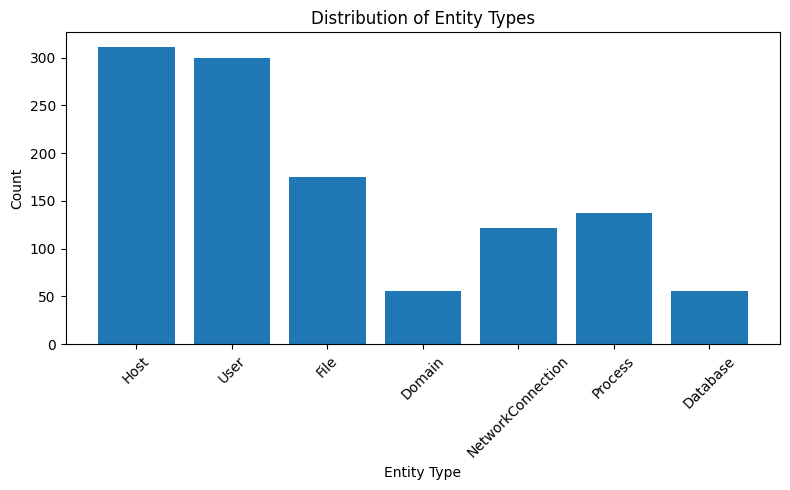

In [ ]:
# Distribution of entity types
entity_types = [entity["type"] for entity in data["entities"]]
type_counts  = Counter(entity_types)

plt.figure(figsize=(8, 5))
plt.bar(type_counts.keys(), type_counts.values())
plt.title("Distribution of Entity Types")
#plt.xlabel("Entity Type")
#plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

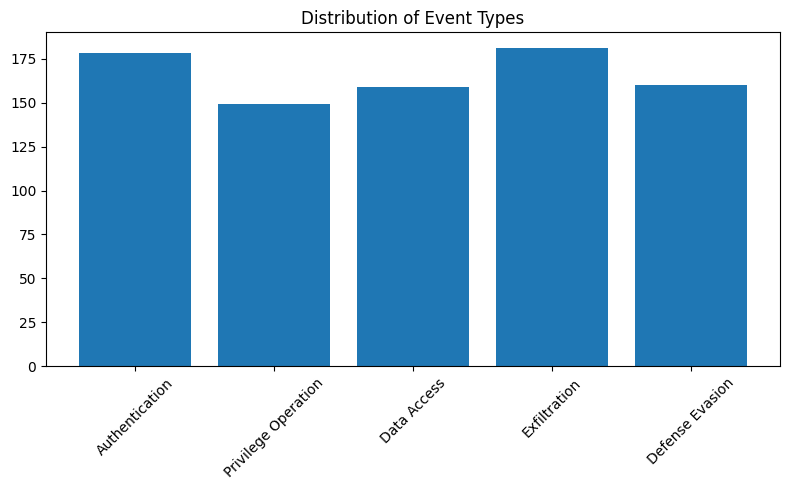

In [3]:
# Distribution of event types
event_types = [event["type"] for event in data["events"]]
type_counts  = Counter(event_types)

plt.figure(figsize=(8, 5))
plt.bar(type_counts.keys(), type_counts.values())
plt.title("Distribution of Event Types")
#plt.xlabel("Event Type")
#plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Weakly connected components: 174


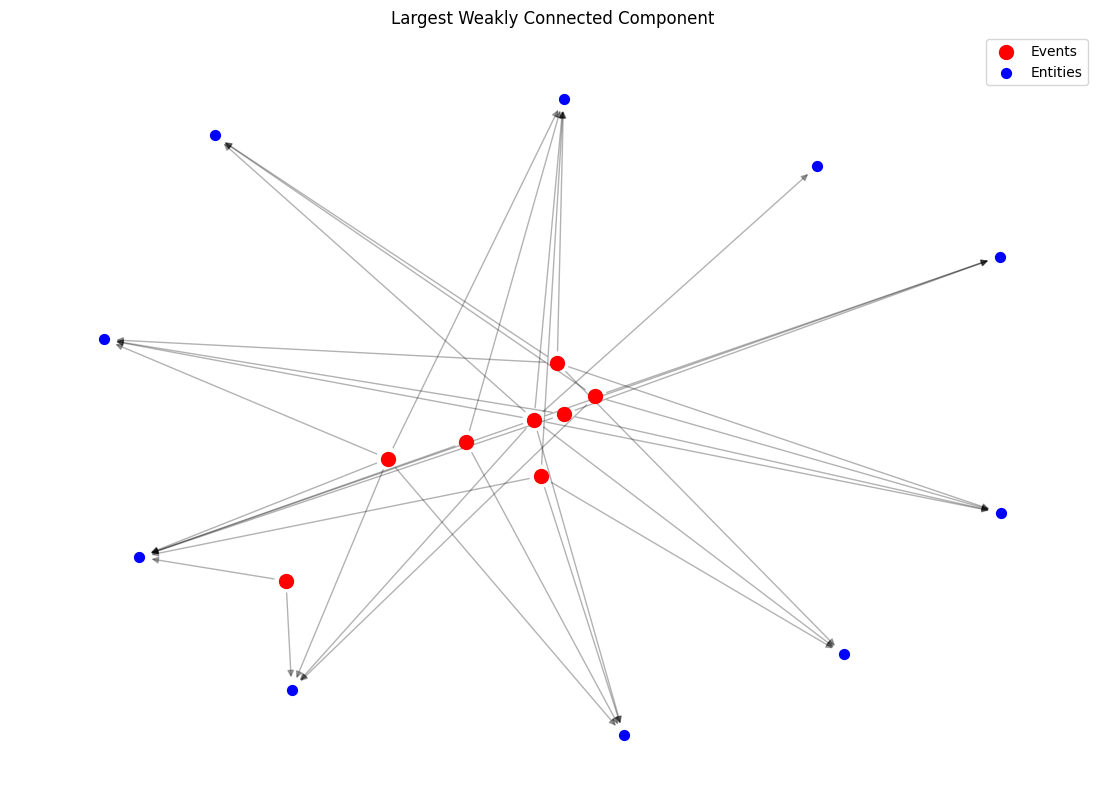

In [15]:
# Connected components
weak_components = list(nx.weakly_connected_components(G))
print(f"Weakly connected components: {len(weak_components)}")

# Plot the largest one just to see
largest_weak_cc = max(nx.weakly_connected_components(G), key=len)
H = G.subgraph(largest_weak_cc).copy()

event_nodes  = [n for n, d in H.nodes(data=True) if d.get("node_type") == "event"]
entity_nodes = [n for n, d in H.nodes(data=True) if d.get("node_type") == "entity"]

pos = nx.spring_layout(H, seed=42)
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(H, pos, nodelist=event_nodes, node_color='red', node_size=100, label='Events')
nx.draw_networkx_nodes(H, pos, nodelist=entity_nodes, node_color='blue', node_size=50, label='Entities')
nx.draw_networkx_edges(H, pos, alpha=0.3)
plt.title("Largest Weakly Connected Component")
plt.legend()
plt.axis("off")
plt.show()

In [16]:
# Alert headers with regex
from re import compile
pattern = compile(r"^([A-Z\s]+?)(?=\s|:|\-|$)")

alert_headers = []
for event in data["events"]:
  msg = event.get("alert_message", "")
  match = pattern.match(msg)
  if match:
    header = match.group(1).strip()
    alert_headers.append(header)

header_counts = Counter(alert_headers)

for header, count in header_counts.items():
  print(f"{header}: {count}")

ALERT: 9
ADMIN: 27
DATA: 50
EXFILTRATION: 26
EVASION: 38
POTENTIAL: 26
BEHAVIORAL: 75
ACCESS: 9
ANOMALOUS: 7
FILE: 6
SECURITY: 6
BEHAVIOR: 22
SSH: 10
PRIVILEGE: 28
OUTBOUND: 7
USER: 18
DNS: 5


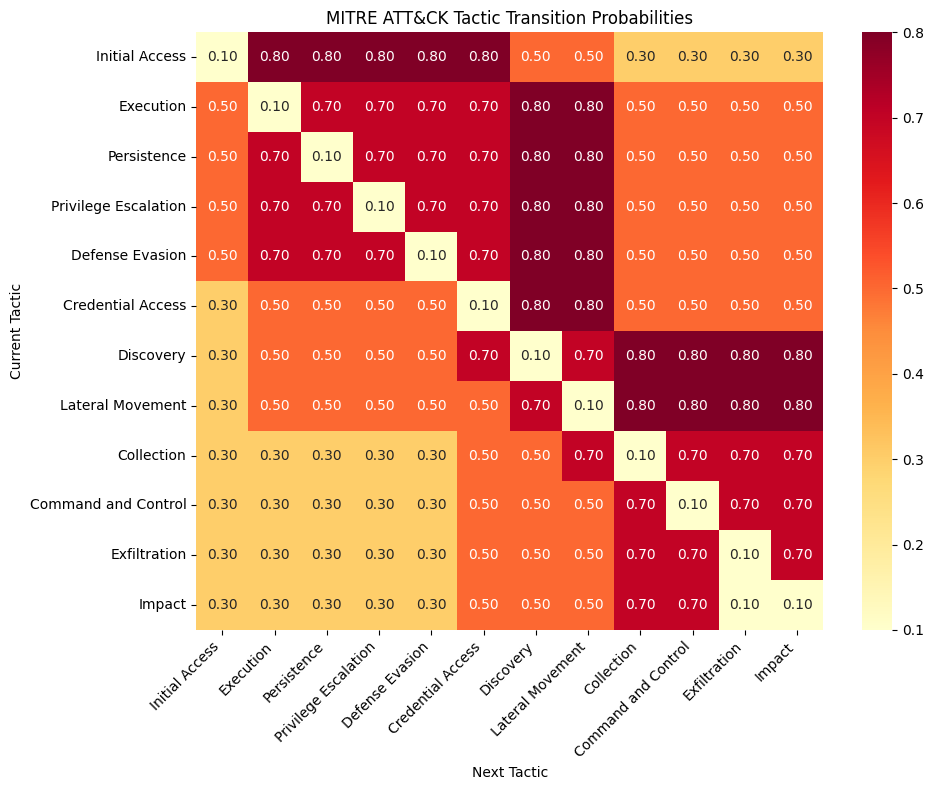

In [ ]:
# MITRE attack transition matrix heatmap

from config import *

matrix = np.array(trans_prob)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt=".2f", cmap="YlOrRd",
            xticklabels=MITRE_TACTICS, yticklabels=MITRE_TACTICS)
plt.title("MITRE ATT&CK Tactic Transition Probabilities")
plt.xlabel("Next Tactic")
plt.ylabel("Current Tactic")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()